In [46]:
import pandas as pd
import numpy as np
archivo = 'csv_creados/Arg_MonetaryAgregates.csv'
df = pd.read_csv(archivo)

#### GDP

GDP : Gross Domestic Product

#### Añadimos a nuestro Data Frame el GDP en términos nominales

In [47]:
archivo = 'Data_in/GDP_F.xlsx'
gdp = pd.read_excel(archivo)

In [48]:
gdp['Año'] = pd.to_datetime(gdp['Año'].astype(str) + '1231', format='%Y%m%d')
df['Año'] = pd.to_datetime(df['Año'])
df = pd.merge(df,gdp, on='Año', suffixes=('_df', '_gdp'))
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU)
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509
1,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807
2,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136
3,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471
4,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472


### CPI

CPI : Consumer price index

#### Añadimos a nuestro Data Frame el CPI en número indice con año base 2016

In [49]:
archivo = 'Data_in/cpi_argentina2.xls'
cpi = pd.read_excel(archivo)
df = pd.merge(df,cpi, on='Año', suffixes=('_df_inflation', '_cpi'))


In [50]:
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (2016 = Base Yr)
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509,1.448536e-11
1,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,1.707203e-11
2,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136,2.276270e-11
3,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471,2.897071e-11
4,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472,3.414405e-11


Añadimos a nuestro Data Frame el GDP en términos reales

In [51]:
df_excel = pd.read_excel('Data_in/GDP_Real_Argentina.xls')
df_excel['Año'] = pd.to_datetime(df_excel['Año'])
df = df.merge(df_excel, on='Año', how='left')

In [52]:
df.head(1)

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (2016 = Base Yr),GDP (constant LCU)
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509,1.448536e-11,NaN


In [53]:
df.to_csv('csv_creados/df_Inflation.csv', index=False)

#### Calculamos la Velocidad del Dinero de M2

Ecuation of Exchange --> M * V = P * Q (PQ = nominal GDP)

V = GDP / M

In [54]:
df['Velocity of M2'] = df['GDP (current LCU)'] / df['M2']

In [55]:
df.head()

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (2016 = Base Yr),GDP (constant LCU),Velocity of M2
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509,1.448536e-11,NaN,6.475506
1,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,1.707203e-11,1.829320e+11,6.382836
2,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136,2.276270e-11,1.928613e+11,7.273797
3,1962-12-31,Pesos,0.015288,0.024283,0.030303,0.033137,0.253471,2.897071e-11,1.912181e+11,8.364576
4,1963-12-31,Pesos,0.021007,0.030905,0.039715,0.043840,0.359472,3.414405e-11,1.810678e+11,9.051316


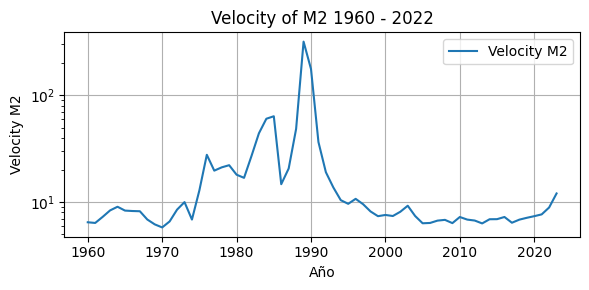

In [56]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 3))
plt.title('Velocity of M2 1960 - 2022')
plt.xlabel('Año')
plt.ylabel('Velocity M2')

plt.plot(df['Año'], df['Velocity of M2'], label='Velocity M2')

plt.yscale("log")  # Agrega la escala logarítmica al eje Y

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
df.to_csv('csv_creados/df_infl.csv', index=False) #df_infl --> datos en términos absolutos

#### Cremos otro Data Frame con las variables en tasas de variación anual

In [58]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [59]:
df_infl_tva = df_infl.copy()
for col in df_infl.columns[2:]:  # Excluye las columnas 'Año' y 'divisa'
    df_infl_tva[col] = df_infl[col].pct_change()

In [60]:
## Eliminamos la primera fila por no poder calcular su TVA
df_infl_tva = df_infl_tva.iloc[1:]
df_infl_tva.reset_index(drop=True, inplace=True)

In [61]:
df_infl_tva.columns = ['Año', 'Divisa', 'M0_gr', 'M1_gr', 'M2_gr', 'M3_gr', 'GDP_gr', 'Inflation Rate', 'GDP_Real_gr', 'Velocity M2_gr']

In [62]:
df_infl_tva.head()

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M2_gr
0,1960-12-31,Pesos,0.207364,0.291750,0.286825,0.303500,0.268410,0.178571,NaN,-0.014311
1,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.277738,0.333333,0.054278,0.139587
2,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.189245,0.272727,-0.008520,0.149960
3,1963-12-31,Pesos,0.374048,0.272704,0.310597,0.322993,0.418199,0.178571,-0.053082,0.082101
4,1964-12-31,Pesos,0.407422,0.436742,0.456275,0.447860,0.340466,0.393939,0.101303,-0.079525


In [63]:
df_infl_tva.to_csv('csv_creados/df_infl_tva.csv',index=False) #df_infl --> datos en términos relativos